In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Color Selection

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

<IPython.core.display.Javascript object>

In [3]:
# Read in the image and print out some stats
image = mpimg.imread("resources/test.jpg")
print("This image is: ", type(image), "with dimensions:", image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


<IPython.core.display.Javascript object>

- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

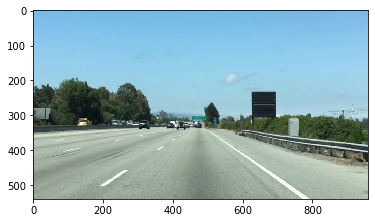

<IPython.core.display.Javascript object>

In [4]:
plt.imshow(image)

In [5]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

color_select = np.copy(image)

<IPython.core.display.Javascript object>

**Note:** always make a copy rather than simply using **"="**

- set the thresholds values until we retain as much of the lane lines as possible while dropping everything else

In [6]:
# Define color selection criteria (color threshold in the variables)
# MODIFY THESE VARIABLES TO MAKE COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

<IPython.core.display.Javascript object>

In [7]:
# Populate rgb_threshold with these values
# This vector contains the MINIMUM values for red, green, and blue (R,G,B) that will be allowed in selection
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

<IPython.core.display.Javascript object>

- do a boolean OR with the "|" character to identify pixels below the thresholds
- all pixels that meet color criterion (those above the threshold) will be retained
- those that do not (below the threshold) will be blacked out

In [8]:
# Identify pixels below the threshold
color_thresholds = (
    (image[:, :, 0] < rgb_threshold[0])  # R - first column
    | (image[:, :, 1] < rgb_threshold[1])  # G - second column
    | (image[:, :, 2] < rgb_threshold[2])  # B - third column
)

print("\nimage\n", image)
print("\nimage[:, :, 0]\n", image[:, :, 0])
print("\nimage[:, :, 1]\n", image[:, :, 1])
print("\nimage[:, :, 2]\n", image[:, :, 2])

print("\ncolor_thresholds\n", color_thresholds)
print("\ncolor_thresholds type: ", type(color_thresholds))


image
 [[[122 185 229]
  [122 185 229]
  [123 186 230]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 ...

 [[154 166 154]
  [156 168 156]
  [153 165 153]
  ...
  [180 197 181]
  [181 198 182]
  [181 198 182]]

 [[162 174 164]
  [160 172 162]
  [152 164 154]
  ...
  [174 192 176]
  [175 193 177]
  [176 194 178]]

 [[156 168 158]
  [148 160 150]
  [137 149 139]
  ...
  [161 179 163]
  [162 180 164]
  [162 180 164]]]

image[:, :, 0]
 [[122 122 123 ... 123 123 123]
 [122 122 122 ... 123 123 123]
 [122 122 122 ... 123 123 123]
 ...
 [154 156 153 ... 180 181 181]
 [162 160 152 ... 174 175 176]
 [156 148 137 ... 161 162 162]]

image[:, :, 1]
 [[185 185 186 ... 184 184 184]
 [185 185 185 ... 184 184 184]
 [185 185 185 ... 184 184 184]
 ...
 [166 168 165 ... 197 198 198]
 [174 1

<IPython.core.display.Javascript object>

- **array slicing with comma** is being used to extract a specific column from an array
- **Note:** this syntax will only work for numpy arrays and not general python lists.
- https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html


In [9]:
# mask color selection
color_select[color_thresholds] = [0, 0, 0]

<IPython.core.display.Javascript object>

- https://stackoverflow.com/a/28430952

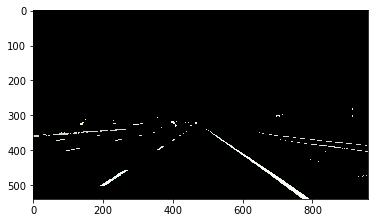

<IPython.core.display.Javascript object>

In [10]:
# display the image
plt.imshow(color_select)

In [11]:
# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.png", color_select)

<IPython.core.display.Javascript object>

# Region Masking

- in this case, let's assume that the front facing camera that took the image is mounted in a fixed position on the car, such that the lane lines will always appear in the same general region of the image

- next, let's take advantage of this by adding a criterion to only consider pixels for color selection in the region where we expect to find the lane lines

In [12]:
region_select = np.copy(image)

<IPython.core.display.Javascript object>

- the variables `left_bottom`, `right_bottom`, and `apex` represent the vertices of a triangular region that we would like to retain for our color selection, while masking everything else out

- here we're using a triangular mask to illustrate the simplest case, but later we'll use a quadrilateral, and in principle, we could use any polygon

In [13]:
# Define a triangle region of interest
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

<IPython.core.display.Javascript object>

**Note:** the origin *(x=0, y=0)* is in the upper left in image processing

- fit lines ***(y=Ax+B)*** to identify the 3 sided region of interest

In [14]:
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)

fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)

fit_bottom = np.polyfit(
    (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1
)

print("fit_left: ", fit_left)
print("fit_right: ", fit_right)
print("fit_bottom: ", fit_bottom)

fit_left:  [-4.61052632e-01  5.39000000e+02]
fit_right:  [ 0.51529412 75.23529412]
fit_bottom:  [-7.30375444e-17  5.39000000e+02]


<IPython.core.display.Javascript object>

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [15]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
print("XX\n", XX)
print("\nYY\n", YY)

XX
 [[  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 ...
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]]

YY
 [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [537 537 537 ... 537 537 537]
 [538 538 538 ... 538 538 538]
 [539 539 539 ... 539 539 539]]


<IPython.core.display.Javascript object>

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

In [16]:
region_thresholds = (
    (YY > (XX * fit_left[0] + fit_left[1]))
    & (YY > (XX * fit_right[0] + fit_right[1]))
    & (YY < (XX * fit_bottom[0] + fit_bottom[1]))
)

print("region_thresholds\n", region_thresholds)

region_thresholds
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


<IPython.core.display.Javascript object>

In [17]:
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

<IPython.core.display.Javascript object>

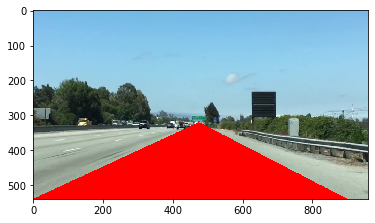

<IPython.core.display.Javascript object>

In [18]:
# Display the image
plt.imshow(region_select)

# Color and Region Combined

- here we’re doing both the color and region selection steps, requiring that a pixel meet both the mask and color selection requirements to be retained
- with one copy we'll extract only the pixels that meet our selection (`color_select`), then we'll paint those pixels red in the original image to see our selection overlaid on the original (`line_image`)

In [19]:
line_image = np.copy(image)

<IPython.core.display.Javascript object>

In [20]:
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Combined Color and Region Selection Image')

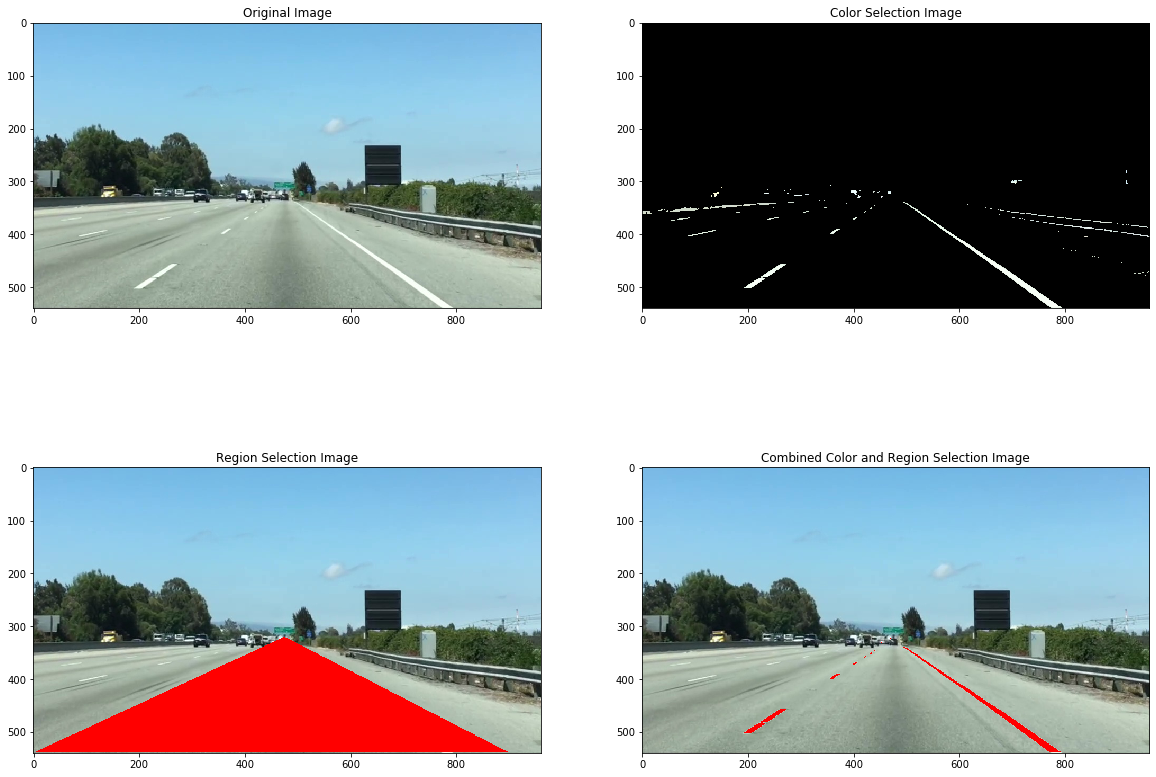

<IPython.core.display.Javascript object>

In [21]:
# Display the image and show region and color selections
fig, ([axis1, axis2], [axis3, axis4]) = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axis1.imshow(image)
axis2.imshow(color_select)
axis3.imshow(region_select)
axis4.imshow(line_image)
axis1.set_title("Original Image")
axis2.set_title("Color Selection Image")
axis3.set_title("Region Selection Image")
axis4.set_title("Combined Color and Region Selection Image")

# x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
# y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
# plt.plot(x, y, "b--", lw=4)

# Finding Lines of any Color

- in the previous part, we have managed to find the lane lines
- lane lines are however, not always the same color, and even lines of the same color under different lighting conditions (day, night, rainy, etc) may fail to be detected by our simple color selection
- we need to take our algorithm to the next level to detect lines of any color using sophisticated computer vision methods

# Canny Edge Detection

- with edge detection, the goal is to identify the boundaries of an object in an image
- to do that, first convert to grayscale
- next, compute the gradient
    - now, the brightness of each pixel corresponds to the strength of the gradient at that point
- find edges by tracing out the pixels that follow the strongest gradients

- by identifying edges, we can more easily detect objects by their shape
- let's first get some intuition by having a look at the parameters for the OpenCV Canny function
    - ```edges = cv2.Canny(gray, low_threshold, high_threshold)```
    - in this case, we're applying the `Canny` function to an image called `gray` and the output will be another image called `edges`
    - `low threshold` and `high threshold` determine how strong the edges must be to be detected
    - you can think of the strength of an edge as being defined by how different the values are in adjacent pixels in the image; really just the strength of the gradient
- https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html

- looking at a greyscale image we see bright points, dark points and all the gray in between
- **rapid changes in brightness are where we find the edges**
- our image is just a mathematical function of _x_ and _y_ so we can perform mathematical operations on it just like any other function $ f(x,y) = \text{pixel value} $
- for example, we can take its derivative $ \dfrac{df}{dx} = \Delta\text{(pixel value)} $ which is just a measure of change of this function
- **a small derivative means small change, big derivative means big change**
- images are two dimensional, so it makes sense to take the derivative with respect to _x_ and _y_ simultaneously
    - this is called the gradient and in computing it, we're measuring how fast pixel values are changing at each point in an image and in which direction they're changing most rapidly
- computing the gradient gives us thick edges
- with the Canny algorithm, we will thin out these edges to find just the individual pixels that follow the strongest gradients
- we'll then extend those strong edges to include pixels all the way down to a lower threshold that we defined when calling the Canny function

**Note!** The standard location of the origin (*x=0*, *y=0*) for images is in the top left corner with _y_ values increasing downward and _x_ increasing to the right. This might seem weird at first, but if you think about an image as a matrix, it makes sense that the *\"00\"* element is in the upper left.

## Canny to Detect Lane Lines

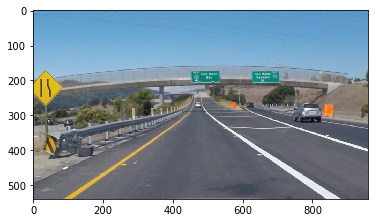

<IPython.core.display.Javascript object>

In [22]:
image = mpimg.imread("resources/exit-ramp.jpg")
plt.imshow(image)

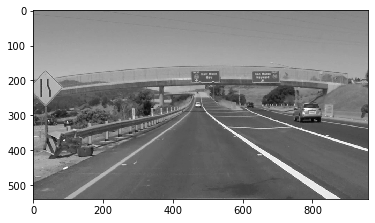

<IPython.core.display.Javascript object>

In [23]:
import cv2  # bringing in OpenCV libraries

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # grayscale conversion
plt.imshow(gray, cmap="gray")

- https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor

- Canny algorithm will first detect strong edge (strong gradient) pixels above the `high_threshold`, and reject pixels below the `low_threshold`
- next, pixels with values between the `low_threshold` and `high_threshold` will be included as long as they are connected to strong edges
- the output edges is a binary image with white pixels tracing out the detected edges and black everywhere else.
- https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

- what would make sense as a reasonable range for these parameters?
- in our case, converting to grayscale has left us with an 8-bit image, so each pixel can take 2^8 = 256 possible values
- hence, the pixel values range from 0 to 255.
- this range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds
- so, a reasonable range for your threshold parameters would also be in the tens to hundreds
- as far as a ratio of `low_threshold` to `high_threshold`, John Canny himself recommended a low to high ratio of ***1:2*** or ***1:3***. 

- we'll also include Gaussian smoothing, before running Canny, which is essentially a way of suppressing noise and spurious gradients by averaging
    - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur
- `cv2.Canny()` actually applies Gaussian smoothing internally, but we include it here because you can get a different result by applying further smoothing (and it's not a changeable parameter within `cv2.Canny()`!
- we can choose the `kernel_size` for Gaussian smoothing to be any odd number
- a larger `kernel_size` implies averaging, or smoothing, over a larger area

In [24]:
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5  # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

<IPython.core.display.Javascript object>

In [25]:
# Define parameters for Canny and run it
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

<IPython.core.display.Javascript object>

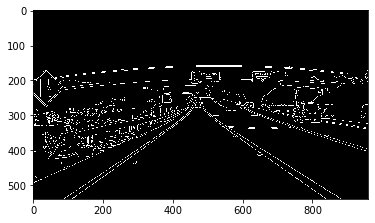

<IPython.core.display.Javascript object>

In [26]:
# Display the image
plt.imshow(edges, cmap="Greys_r")

# Hough Transform

- to find lines, we need to first adopt a model of a line and then fit that model to the assortment of dots in edge detected image
- keeping in mind that our image is just a function of **x** and **y**, we can use the old familiar equation of a line ***y = mx + b***
    - in this case our model includes two parameters, **m** and **b**
- in image space, a line is plotted as ***x versus y***, but in parameter space, which we will call Hough space, we can represent that same line as ***m versus b*** instead
- the Hough transform is just a conversion from image space to Hough space
- so the characterization of a line in image space will be a single point at the position m-b in Hough space

<img src="resources/HoughTransform/imagespace_houghspace.png" style="width: 70%;"/>

- so **a line in image space corresponds to a point in Hough space**
    - what does a point in image space correspond to in Hough space?
- a single point in image space has many possible lines that pass through it, but not just any lines, only those with particular combinations of the _m_ and _b_ parameters
- rearranging the equation of a line, we find that a single point _(x,y)_ corresponds to the line ***b = y - xm***
- **a point in image space describes a line in Hough space**
    - so a line in an image is a point in Hough space and a point in an image is a line in Hough space

- **two points in image space correspond to two lines in Hough space**
    - not only that, but these lines must interset

<img src="resources/HoughTransform/imagespace_two_dots.png" style="width: 70%;"/>
    
 
- **the intersection point of the two lines in Hough space correspond to a line in image space that passes through both *(x1, y1)* and *(x2, y2)* in image space**
    - the intersection point at *(m0, b0)* represents the line *y = m0x + b0* in image space and it must be the line that passes through both points!

<img src="resources/HoughTransform/houghspace_intersection.png" style="width: 70%;"/>

- our strategy to find lines in image space will be to look for intersecting lines in Hough space
- we do this by dividing up our Hough space into a grid, and define intersecting lines as all lines passing through a given grid cell

<img src="resources/HoughTransform/imagespace_houghspace_grid.png" style="width: 70%;"/>

- to do this, we first run the Canny edge detection algorithm to find all points associated with edges in my image
- we can then consider every point in this edge-detected image as a line in Hough space
- where many lines in Hough space intersect, we declare we have found a collection of points that describe a line in image space

- we have a problem though: vertical lines have infinite slope in ***m-b*** representation, so we need a new parameterization
- let's redefine our line in polar coordinates
    - now the variable, **ρ (rho)** describes the perpendicular distance of the line from the origin
    - and **θ (theta)** is the angle of the line away from horizontal

<img src="resources/HoughTransform/imagespace_houghspace_polar_coordinates.png" style="width: 70%;"/>

- now each point in image space corresponds to a sine curve in Hough space
- if we take a whole line of points it translates into a whole bunch of sine curves in Hough space
- the intersection of those sine curves in ***θ-ρ*** space gives the parameterization of the line

<img src="resources/HoughTransform/imagespace_houghspace_sine_curve.png" style="width: 70%;"/>

## Hough Transform to Find Lane Lines

- to accomplish the task of finding lane lines, we need to specify some parameters to say what kind of lines we want to detect (i.e., long lines, short lines, bendy lines, dashed lines, etc.)
- to do this, we'll be using an OpenCV function called `HoughLinesP` that takes several parameters
- https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
- for a look at coding up a Hough Transform from scratch, check this out: https://alyssaq.github.io/2014/understanding-hough-transform/

- let's look at the input parameters for the OpenCV function _HoughLinesP_ that we will use to find lines in the image
- ```lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)```
- in this case, we are operating on the image `masked_edges` (the output from Canny) and the output from `HoughLinesP` will be `lines`, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation
- the other parameters define just what kind of line segments we're looking for
- `rho` and `theta` are the distance and angular resolution of our grid in Hough space
    - remember that, in Hough space, we have a grid laid out along the (Θ, ρ) axis
    - we need to specify **rho in units of pixels** and **theta in units of radians**
    - so, what are reasonable values? Well, rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree (pi/180 in radians)
    - scale these values up to be more flexible in your definition of what constitutes a line
- the `threshold` parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output
- the empty `np.array([])` is just a placeholder, no need to change it
- `min_line_length` is the minimum length of a line (in pixels) that we will accept in the output
- `max_line_gap` is the maximum distance (again, in pixels) between segments that we will allow to be connected into a single line
- we can then iterate through your output lines and draw them onto the image to see what we got

- we'll want to apply a region of interest mask to filter out detected line segments in other areas of the image
- earlier in this lesson we used a triangular region mask, but this time we'll get a chance to use a quadrilateral region mask using the `cv2.fillPoly()` function https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#fillpoly
    - keep in mind though, we could use this same method to mask an arbitrarily complex polygon region

In [27]:
# Read in and grayscale the image
image = mpimg.imread("resources/exit-ramp.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

<IPython.core.display.Javascript object>

In [28]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

<IPython.core.display.Javascript object>

In [29]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

<IPython.core.display.Javascript object>

In [30]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)
ignore_mask_color = 255

<IPython.core.display.Javascript object>

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html

In [31]:
# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array(
    [[(0, imshape[0]), (450, 290), (490, 290), (imshape[1], imshape[0])]],
    dtype=np.int32,
)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

<IPython.core.display.Javascript object>

In [32]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(image) * 0  # creating a blank to draw lines on

<IPython.core.display.Javascript object>

In [33]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(
    masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap
)

<IPython.core.display.Javascript object>

In [34]:
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

<IPython.core.display.Javascript object>

In [35]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

<IPython.core.display.Javascript object>

- https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=line#line
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.dstack.html

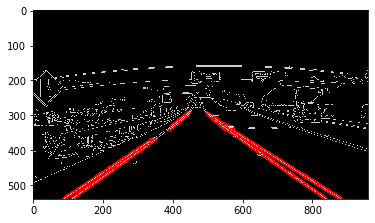

<IPython.core.display.Javascript object>

In [36]:
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)

# Tuning Parameters

- parameter tuning is one of the biggest challenges in Computer Vision
- what works well for one image may not work at all with different lighting and/or backgrounds
- Computer Vision Engineers gain an intuition over time for ranges of parameters and different techniques that might work best for a set of situations
- when getting started, this can be a big hill to climb
- oftentimes, building a tool to help speed up your iteration between different techniques and thresholds can help you in parameter tuning
- while it's not required for the project, you might consider reading this blog post from a fellow Self-Driving Car student on their approach to a parameter tuning tool, and consider building one of your own in the future! https://medium.com/@maunesh/finding-the-right-parameters-for-your-computer-vision-algorithm-d55643b6f954